In [977]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from datetime import date, timedelta, datetime
import re
import pandas as pd
import os

import seaborn as sns

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import matplotlib.pyplot as plt

from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def Getting_Flight_Info(URL):
    driver = webdriver.Chrome('/Users/robjohns/Documents/Metis/Project2/chromedriver')
    driver.get(URL)
    time.sleep(2)
    soup = BeautifulSoup(driver.page_source, 'lxml')
    driver.quit()
    data=DataGetter(URL,soup)
    return data



In [241]:
print(super_short_test_list_dates)
print(super_short_test_list)

['2019-07-22', '2019-09-03', '2019-10-16', '2019-11-28', '2019-07-22', '2019-09-03', '2019-10-16', '2019-11-28']
['https://www.google.com/flights?hl=en#flt=SEA.SFO.2019-07-22;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.SFO.2019-09-03;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.SFO.2019-10-16;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.SFO.2019-11-28;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.ORD.2019-07-22;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.ORD.2019-09-03;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.ORD.2019-10-16;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o', 'https://www.google.com/flights?hl=en#flt=SEA.ORD.2019-11-28;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o']


In [273]:


for URL in full_url_list[978:]:
    data=Getting_Flight_Info(URL)
    data=pd.DataFrame(data)
    
    Locations = re.search('#flt=(.+?);b:1', URL).group(1)
    Spots=Locations.split('.')
    Departure=Spots[0]
    Arrival = Spots[1]
    Date= Spots[2]
    Date=Date.replace('-',"_")
     
    data.to_pickle(f'Picklefolder/{Departure}_{Arrival}_{Date}')
    print(f'did {name}')

#testy=pd.read_pickle('Picklefolder/testpickle')
#print(testy)
     

num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20



num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 20

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 18

did 2019-11-28
num of flights: 19

did 2019-11-28
num of flights: 18

did 2019-11-28
num of flights: 18



num of flights: 5

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 6

did 2019-11-28
num of flights: 5

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights: 7

did 2019-11-28
num of flights

num of flights: 8

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 8

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 8

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 8

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 9

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 10

did 2019-11-28
num of flights: 8

did 2019-11-2

num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 12

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 12

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 13

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 12

did 2019-11-28
num of flights: 12

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 14

did 2019-11-28
num of flights: 12

did 2019-11-28


In [255]:
filelist = os.listdir('Picklefolder/') 

In [256]:
filelist


['SEA_SFO_2019_09_03',
 'SEA_ORD_2019_10_16',
 '.DS_Store',
 'SEA_ORD_2019_11_28',
 'SEA_ORD_2019_07_22',
 'SEA_SFO_2019_07_22',
 'SEA_SFO_2019_10_16',
 'SEA_ORD_2019_09_03',
 'SEA_SFO_2019_11_28']

In [329]:

#testy=pd.read_pickle('Picklefolder/testpickle')

#list the files
filelist = os.listdir('Picklefolder/') 
#read them into pandas
df_list = [pd.read_pickle(f'Picklefolder/{file}') for file in filelist if file[0]!='.']
#concatenate them together
df = pd.concat(df_list,ignore_index=True)
df.tail(5)
#print(testy)



,0,1,2,3,4,5,6,7,8,9,10
21468,https://www.google.com/flights?hl=en#flt=SEA.O...,2019-10-31,SEA,ORD,3.83,160,11:30 P,5:20 A,American,AA1408,Boeing 737
21469,https://www.google.com/flights?hl=en#flt=SEA.O...,2019-10-31,SEA,ORD,3.90,175,7:00 A,12:54 P,United,UA2287,Boeing 737
21470,https://www.google.com/flights?hl=en#flt=SEA.O...,2019-10-31,SEA,ORD,3.97,175,11:04 A,5:02 P,United,UA278,Boeing 737
21471,https://www.google.com/flights?hl=en#flt=SEA.O...,2019-10-31,SEA,ORD,3.85,175,2:10 P,8:01 P,United,UA670,Boeing 737
21472,https://www.google.com/flights?hl=en#flt=SEA.O...,2019-10-31,SEA,ORD,3.78,182,5:55 P,11:42 P,Delta,DL853,Airbus A319


In [330]:
df.dtypes
name_dict={0:'URL',1:'Date',2:'Origin',3:'Destination',4:'FlightDuration',5:'Price',6:'Time_depart',
          7:'Time_arrive',8:'Airline',9:'FlightNumber',10:'PlaneType'}
df.rename(name_dict,axis=1,inplace=True)

In [331]:
df.head(100)

,URL,Date,Origin,Destination,FlightDuration,Price,Time_depart,Time_arrive,Airline,FlightNumber,PlaneType
0,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.17,124,3:25 P,11:35 P,Delta,DL341,Boeing 737
1,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.18,179,11:59 P,8:10 A,JetBlue,"(REGEXerror:, Airbus A320B6 498)","(REGEXerror:, Airbus A320B6 498)"
2,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.33,184,3:50 P,12:10 A,Alaska,AS736,Boeing 737
3,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.50,164,7:50 A,4:20 P,Delta,DL1163,Boeing 737
4,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.37,179,11:33 A,7:55 P,JetBlue,"(REGEXerror:, Airbus A320B6 598)","(REGEXerror:, Airbus A320B6 598)"
5,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.33,184,9:15 P,5:35 A,Alaska,AS24,Boeing 737
6,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.35,204,10:40 P,7:01 A,Delta,DL2635,Boeing 737
7,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.50,339,6:50 A,3:20 P,Alaska,AS12,Boeing 737
8,https://www.google.com/flights?hl=en#flt=SEA.J...,2019-08-09,SEA,JFK,5.70,260,1:18 P,10:00 P,JetBlue,"(REGEXerror:, Airbus A320B6 464)","(REGEXerror:, Airbus A320B6 464)"
9,https://www.google.com/flights?hl=en#flt=SEA.J...,2019-08-09,SEA,JFK,5.43,260,10:26 P,6:52 A,JetBlue,"(REGEXerror:, Airbus A320B6 264)","(REGEXerror:, Airbus A320B6 264)"


In [332]:
#Cleaning up Data types

df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Date"] = pd.to_datetime(df["Date"])


df["Time_depart"] = df["Time_depart"].apply(lambda x: f'{x}M')
df["Time_arrive"] = df["Time_arrive"].apply(lambda x: f'{x}M')

df["Time_depart"] = pd.to_datetime(df["Time_depart"],format='%I:%M %p',errors='coerce')
df["Time_arrive"] = pd.to_datetime(df["Time_arrive"],format='%I:%M %p',errors='coerce')

df.dtypes

URL                       object
Date              datetime64[ns]
Origin                    object
Destination               object
FlightDuration           float64
Price                    float64
Time_depart       datetime64[ns]
Time_arrive       datetime64[ns]
Airline                   object
FlightNumber              object
PlaneType                 object
dtype: object

In [578]:
df2=df
df2=df2.dropna(axis=0)
#df.describe()
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20565 entries, 0 to 21472
Data columns (total 11 columns):
URL               20565 non-null object
Date              20565 non-null datetime64[ns]
Origin            20565 non-null object
Destination       20565 non-null object
FlightDuration    20565 non-null float64
Price             20565 non-null float64
Time_depart       20565 non-null datetime64[ns]
Time_arrive       20565 non-null datetime64[ns]
Airline           20565 non-null object
FlightNumber      20565 non-null object
PlaneType         20565 non-null object
dtypes: datetime64[ns](3), float64(2), object(6)
memory usage: 1.9+ MB


,URL,Date,Origin,Destination,FlightDuration,Price,Time_depart,Time_arrive,Airline,FlightNumber,PlaneType
0,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.17,124.0,1900-01-01 15:25:00,1900-01-01 23:35:00,Delta,DL341,Boeing 737
1,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.18,179.0,1900-01-01 23:59:00,1900-01-01 08:10:00,JetBlue,"(REGEXerror:, Airbus A320B6 498)","(REGEXerror:, Airbus A320B6 498)"
2,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.33,184.0,1900-01-01 15:50:00,1900-01-01 00:10:00,Alaska,AS736,Boeing 737
3,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.50,164.0,1900-01-01 07:50:00,1900-01-01 16:20:00,Delta,DL1163,Boeing 737
4,https://www.google.com/flights?hl=en#flt=SEA.B...,2019-09-12,SEA,BOS,5.37,179.0,1900-01-01 11:33:00,1900-01-01 19:55:00,JetBlue,"(REGEXerror:, Airbus A320B6 598)","(REGEXerror:, Airbus A320B6 598)"


In [1103]:
#here we make the tables that will go through the model, all data, daily mins (per route), and daily avg (per route)
df2=df
df2=df2.dropna(axis=0)
df2= df2.drop(['URL','Origin','Time_depart','Time_arrive','FlightNumber','PlaneType'],axis=1)

#use this to get min of flights, it works
df_min=(df2.sort_values(['Price'], ascending=[True]).groupby(['Destination','Date'])
 .head(1))

#this takes daily averages
df_avg=df2.groupby(['Destination','Date'],as_index=False).mean()

#this keeps all flights, but renamed so we can mess with it without saving over data
df_all=df2


df_min.info()
df_avg.info()
df_all.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 1691 to 15136
Data columns (total 5 columns):
Date              1772 non-null datetime64[ns]
Destination       1772 non-null object
FlightDuration    1772 non-null float64
Price             1772 non-null float64
Airline           1772 non-null object
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 83.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1772 entries, 0 to 1771
Data columns (total 4 columns):
Destination       1772 non-null object
Date              1772 non-null datetime64[ns]
FlightDuration    1772 non-null float64
Price             1772 non-null float64
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 69.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20565 entries, 0 to 21472
Data columns (total 5 columns):
Date              20565 non-null datetime64[ns]
Destination       20565 non-null object
FlightDuration    20565 non-null float64
Price             20565 non-null

In [1104]:
##Use this block to makes days and block out the holidays for now until we figure out a feature mask for them
basedate = pd.Timestamp('2019-07-22')

cropdate=120

df_min['Days'] = df_min['Date'].apply(lambda x: (x - basedate).days)
mask = ((df_min['Days'] < cropdate))
df_min=df_min[mask]



df_avg['Days'] = df_avg['Date'].apply(lambda x: (x - basedate).days)
mask2 = ((df_avg['Days'] < cropdate))
df_avg=df_avg[mask2]



df_all['Days'] = df_all['Date'].apply(lambda x: (x - basedate).days)
mask3 = ((df_all['Days'] < cropdate))
df_all=df_all[mask3]



df_min.info()
df_avg.info()
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1691 to 15136
Data columns (total 6 columns):
Date              1320 non-null datetime64[ns]
Destination       1320 non-null object
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Airline           1320 non-null object
Days              1320 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 72.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 0 to 1728
Data columns (total 5 columns):
Destination       1320 non-null object
Date              1320 non-null datetime64[ns]
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Days              1320 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 61.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15878 entries, 0 to 21472
Data columns (total 6 columns):
Date              15878 non-null datetime64[ns]
Destination      

In [1105]:
df_min.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1691 to 15136
Data columns (total 6 columns):
Date              1320 non-null datetime64[ns]
Destination       1320 non-null object
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Airline           1320 non-null object
Days              1320 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 72.2+ KB


In [1106]:
##lets get a linear regression going
df_min.corr()
#df_avg.corr()
#df_all.corr()

,FlightDuration,Price,Days
FlightDuration,1.000000,0.639393,-0.014088
Price,0.639393,1.000000,-0.390316
Days,-0.014088,-0.390316,1.000000


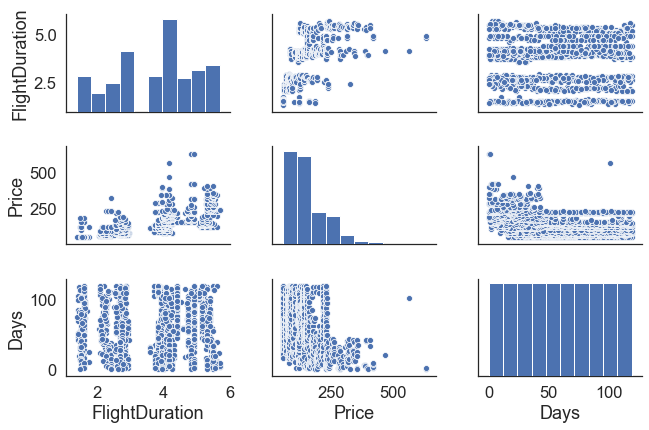

In [1107]:
sns.pairplot(df_min, height=2.1, aspect=1.5);

In [1108]:
df_min_dum_weekday.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1691 to 15136
Data columns (total 26 columns):
Date              1320 non-null datetime64[ns]
Destination       1320 non-null object
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Airline           1320 non-null object
Days              1320 non-null int64
weekday           1320 non-null object
Daysmin21         1320 non-null int64
Daysmin28         1320 non-null int64
Daysmin35         1320 non-null int64
Daysmin42         1320 non-null int64
Daysmin49         1320 non-null int64
Daysmin56         1320 non-null int64
Daysmin63         1320 non-null int64
Daysmin70         1320 non-null int64
Daysmin77         1320 non-null int64
Daysmin84         1320 non-null int64
Daysmin91         1320 non-null int64
Daysmin98         1320 non-null int64
Friday            1320 non-null uint8
Monday            1320 non-null uint8
Saturday          1320 non-null uint8
Sunday            1320 non-null uint8

In [1109]:
df_min_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1691 to 15136
Data columns (total 30 columns):
Date              1320 non-null datetime64[ns]
Destination       1320 non-null object
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Airline           1320 non-null object
Days              1320 non-null int64
weekday           1320 non-null object
Daysmin21         1320 non-null int64
Daysmin28         1320 non-null int64
Daysmin35         1320 non-null int64
Daysmin42         1320 non-null int64
Daysmin49         1320 non-null int64
Daysmin56         1320 non-null int64
Daysmin63         1320 non-null int64
Daysmin70         1320 non-null int64
Daysmin77         1320 non-null int64
Daysmin84         1320 non-null int64
Daysmin91         1320 non-null int64
Daysmin98         1320 non-null int64
ATL               1320 non-null uint8
AUS               1320 non-null uint8
BOI               1320 non-null uint8
BOS               1320 non-null uint8

In [1125]:
##lets add some features for our model now##


##Destination dummies!!!!

df_min_dum = pd.concat([df_min, pd.get_dummies(df_min['Destination'])], axis=1)
df_avg_dum = pd.concat([df_avg, pd.get_dummies(df_avg['Destination'])], axis=1)
df_all_dum = pd.concat([df_all, pd.get_dummies(df_all['Destination'])], axis=1)

#Weekday dummies!!!!
df_min['weekday'] = df_min['Date'].dt.weekday_name
df_avg['weekday'] = df_avg['Date'].dt.weekday_name
df_all['weekday'] = df_avg['Date'].dt.weekday_name


df_min_dum_weekday = pd.concat([df_min, pd.get_dummies(df_min['weekday'])], axis=1)
df_avg_dum_weekday = pd.concat([df_avg, pd.get_dummies(df_avg['weekday'])], axis=1)
df_all_dum_weekday = pd.concat([df_all, pd.get_dummies(df_all['weekday'])], axis=1)


###price min reached dates!!!

Daymins=[21,28,35,42,49,56]
for days in Daymins:
    newcolumn = np.minimum(df_min.Days,days)
    df_min[f'Daysmin{days}']=newcolumn

for days in Daymins:
    newcolumn = np.minimum(df_avg.Days,days)
    df_avg[f'Daysmin{days}']=newcolumn
    
for days in Daymins:
    newcolumn = np.minimum(df_all.Days,days)
    df_all[f'Daysmin{days}']=newcolumn    

    
### Airline??    


df_everything=pd.concat([df_all, pd.get_dummies(df_all['Destination'])], axis=1)
df_everything_min=pd.concat([df_min, pd.get_dummies(df_min['Destination'])], axis=1)

for days in Daymins:
    newcolumn = np.minimum(df_everything.Days,days)
    df_everything[f'Daysmin{days}']=newcolumn
    
for days in Daymins:
    newcolumn = np.minimum(df_everything_min.Days,days)
    df_everything_min[f'Daysmin{days}']=newcolumn    



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [1245]:
df_all2=df_all
for days in Daymins:
    newcolumn = np.minimum(df_all.Days,days)
    df_all2[f'Advance_Days:{days}']=newcolumn  

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1246]:
df_all2.head()

,Date,Destination,FlightDuration,Price,Airline,Days,weekday,Daysmin21,Daysmin28,Daysmin35,Daysmin42,Daysmin49,Daysmin56,Advance_Days:21,Advance_Days:28,Advance_Days:35,Advance_Days:42,Advance_Days:49,Advance_Days:56
0,2019-09-12,BOS,5.17,124.0,Delta,52,Monday,21,28,35,42,49,52,21,28,35,42,49,52
1,2019-09-12,BOS,5.18,179.0,JetBlue,52,Tuesday,21,28,35,42,49,52,21,28,35,42,49,52
2,2019-09-12,BOS,5.33,184.0,Alaska,52,Wednesday,21,28,35,42,49,52,21,28,35,42,49,52
3,2019-09-12,BOS,5.50,164.0,Delta,52,Thursday,21,28,35,42,49,52,21,28,35,42,49,52
4,2019-09-12,BOS,5.37,179.0,JetBlue,52,Friday,21,28,35,42,49,52,21,28,35,42,49,52


In [1126]:
df_min_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1320 entries, 1691 to 15136
Data columns (total 17 columns):
Date              1320 non-null datetime64[ns]
Destination       1320 non-null object
FlightDuration    1320 non-null float64
Price             1320 non-null float64
Airline           1320 non-null object
Days              1320 non-null int64
ATL               1320 non-null uint8
AUS               1320 non-null uint8
BOI               1320 non-null uint8
BOS               1320 non-null uint8
DEN               1320 non-null uint8
DTW               1320 non-null uint8
FAI               1320 non-null uint8
JFK               1320 non-null uint8
ORD               1320 non-null uint8
SAN               1320 non-null uint8
SFO               1320 non-null uint8
dtypes: datetime64[ns](1), float64(2), int64(1), object(2), uint8(11)
memory usage: 126.4+ KB


In [1127]:
df_everything.head()

,Date,Destination,FlightDuration,Price,Airline,Days,weekday,Daysmin21,Daysmin28,Daysmin35,...,AUS,BOI,BOS,DEN,DTW,FAI,JFK,ORD,SAN,SFO
0,2019-09-12,BOS,5.17,124.0,Delta,52,Monday,21,28,35,...,0,0,1,0,0,0,0,0,0,0
1,2019-09-12,BOS,5.18,179.0,JetBlue,52,Tuesday,21,28,35,...,0,0,1,0,0,0,0,0,0,0
2,2019-09-12,BOS,5.33,184.0,Alaska,52,Wednesday,21,28,35,...,0,0,1,0,0,0,0,0,0,0
3,2019-09-12,BOS,5.50,164.0,Delta,52,Thursday,21,28,35,...,0,0,1,0,0,0,0,0,0,0
4,2019-09-12,BOS,5.37,179.0,JetBlue,52,Friday,21,28,35,...,0,0,1,0,0,0,0,0,0,0


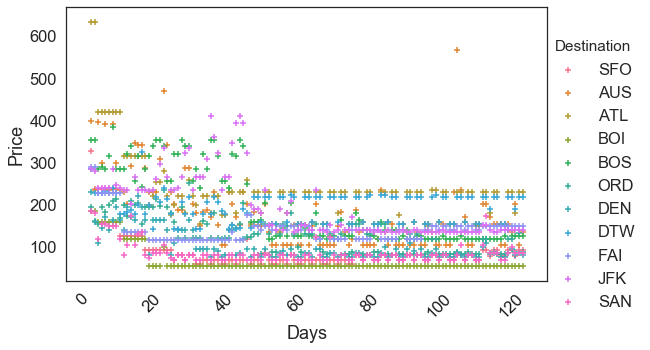

In [1128]:

sns.set(font_scale=1.5)
sns.set_style("white")

fg = sns.FacetGrid(data=df_min, hue='Destination', hue_order=cities, height=5, aspect=1.61, despine=False,);

fg.map(plt.scatter, 'Days', 'Price',marker="+").add_legend();
fg.set_xticklabels( rotation=45, horizontalalignment='right', color='k');


#fg.savefig('flights.png', transparent=True,bbox_inches='tight')


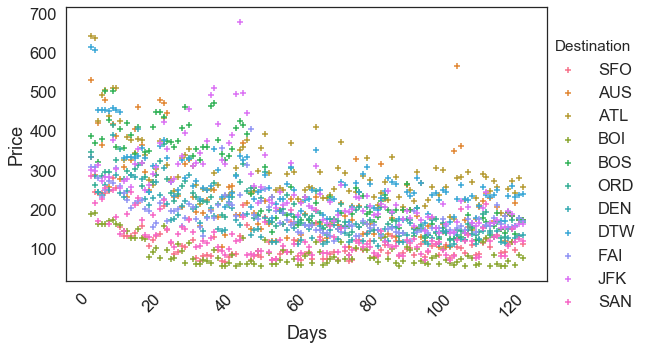

In [1256]:
fg = sns.FacetGrid(data=df_avg, hue='Destination', hue_order=cities, height=5, aspect=1.61, despine=False,);

fg.map(plt.scatter, 'Days', 'Price',marker="+").add_legend();
fg.set_xticklabels( rotation=45, horizontalalignment='right', color='k');

fg.savefig('avgflights.png', transparent=True,bbox_inches='tight')


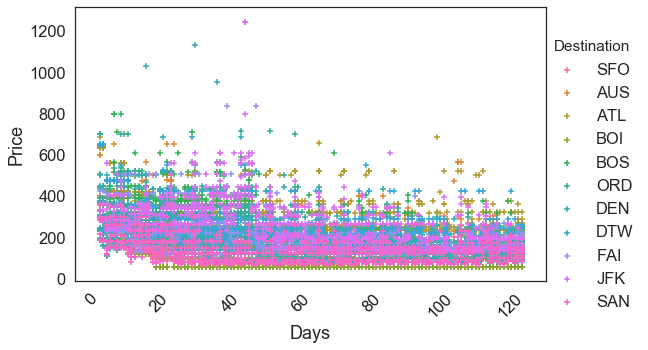

In [1130]:
fg = sns.FacetGrid(data=df_all, hue='Destination', hue_order=cities, height=5, aspect=1.61, despine=False,);

fg.map(plt.scatter, 'Days', 'Price',marker="+" ).add_legend();
fg.set_xticklabels( rotation=45, horizontalalignment='right', color='k');


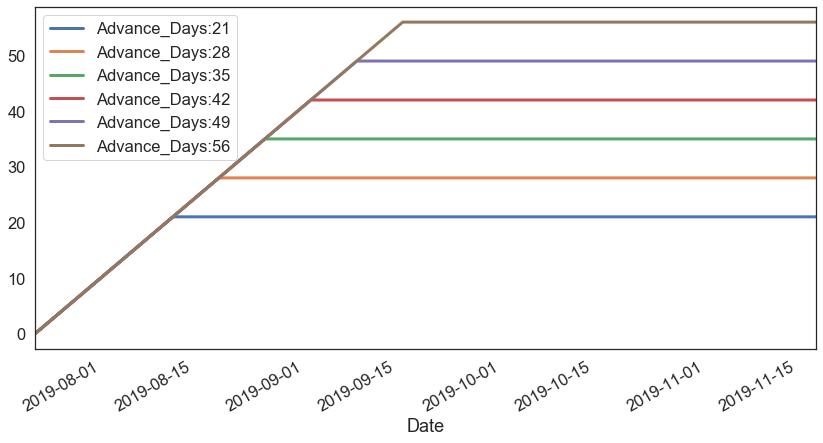

In [1255]:

#df_avg.plot(x ='Date', y='Price',figsize=(11,7))
feature = df_all2.plot(x ='Date', y=['Advance_Days:21','Advance_Days:28','Advance_Days:35','Advance_Days:42','Advance_Days:49','Advance_Days:56'],figsize=(14,7),
                      linewidth=3.0)
#df_avg.plot(x ='Date', y='Daysmin35',figsize=(11,7))
fig = feature.get_figure()
fig.savefig('step.png', transparent=True,bbox_inches='tight')

In [1131]:
##These are all the data frames that you made to model on

#df_min_dum.head()
#df_avg_dum.head()
#df_all_dum.head()

#df_min_dum_weekday.head()
#df_avg_dum_weekday.head()
#df_all_dum_weekday.head()

#df_min.head()
#df_avg.head()
#df_all.head()

#df_everything.head()
#df_everything_min.head()

In [1268]:
##simple OLS of cities dummy

#df_min_dum.head()  R2=0.63
#y,X= df_min_dum['Price'],df_min_dum.drop(['Price','Date','Destination','Airline'],axis=1)

#df_avg_dum.head()  R2=0.65
#y,X= df_avg_dum['Price'],df_avg_dum.drop(['Price','Date','Destination'],axis=1)

#df_all_dum.head() R2=0.53
#y,X= df_all_dum['Price'],df_all_dum.drop(['Price','Date','Destination','Airline'],axis=1)

In [759]:
##simple OLS of weekday dummy

#df_min_dum_weekday.head()  R2=0.57
#y,X= df_min_dum_weekday['Price'],df_min_dum_weekday.drop(['Price','Date','Destination','Airline','weekday'],axis=1)

#df_avg_dum_weekday.head()  R2=0.62
#y,X= df_avg_dum_weekday['Price'],df_avg_dum_weekday.drop(['Price','Date','Destination','weekday'],axis=1)

#df_all_dum_weekday.head()  R2=0.85
#y,X= df_all_dum_weekday['Price'],df_all_dum_weekday.drop(['Price','Date','Destination','Airline','weekday'],axis=1)



In [1273]:
##Simple OLS of weekdaycutoff
#df_min.head() R2=0.90
#y,X= df_min['Price'],df_min.drop(['Price','Date','Destination','Airline','weekday'],axis=1)

#df_avg.head()   R2=0.91
#y,X= df_avg['Price'],df_avg.drop(['Price','Date','Destination','weekday'],axis=1)

#df_all.head()   R2=0.86
y,X= df_all['Price'],df_all.drop(['Price','Date','Destination','Airline','weekday'],axis=1)


In [1274]:
##simple OLS of everything model

y,X= df_everything['Price'],df_everything.drop(['Price','Date','Destination','Airline','weekday'],axis=1)


In [1279]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)

In [1280]:
#model = sm.OLS(y, X)
model = sm.OLS(y_train_val, X_train_val)

In [1281]:
fit = model.fit()

In [1282]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     975.7
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        01:14:02   Log-Likelihood:                -72084.
No. Observations:               12702   AIC:                         1.442e+05
Df Residuals:                   12683   BIC:                         1.443e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
FlightDuration    68.8565      6.000     11.475      0.000      57.095      80.618
Days              -0.1637      0.047     -3.510      0.000      -0.255      -0.072
Daysmin21         -3.4639      0.742     -4.670      0.000      -4.918      -2.010
Daysmin28          2.2384      1.213      1.846      0.065      -0.138       4.615
Daysmin35        -10.5286      1.331     -7.912      0.000     -13.137      -7.920
Daysmin42         15.6325      1.385     11.288      0.000      12.918      18.347
Daysmin49         -8.8424      1.237     -7.147      0.000     -11.267      -6.417
Daysmin56          0.1815      0.586      0.310      0.757      -0.966       1.329
ATL               96.9483     29.085      3.333      0.001      39.937     153.960
AUS               71.9199     25.271      2.846      0.004      22.384     121.456
BOI              113.9857      9.998     11.400      0.000      94.387     133.584
BOS               20.0304     32.838      0.610      0.542     -44.338      84.399
DEN              118.0332     16.698      7.069      0.000      85.303     150.763
DTW              107.5854     26.052      4.130      0.000      56.520     158.651
FAI               44.5504     23.813      1.871      0.061      -2.126      91.227
JFK               10.8330     32.869      0.330      0.742     -53.596      75.262
ORD               60.3475     24.874      2.426      0.015      11.590     109.105
SAN               66.2944     17.313      3.829      0.000      32.359     100.230
SFO               90.6150     14.024      6.462      0.000      63.126     118.104
==============================================================================
Omnibus:                     6324.812   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91001.188
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      15.463   Cond. No.                     1.34e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

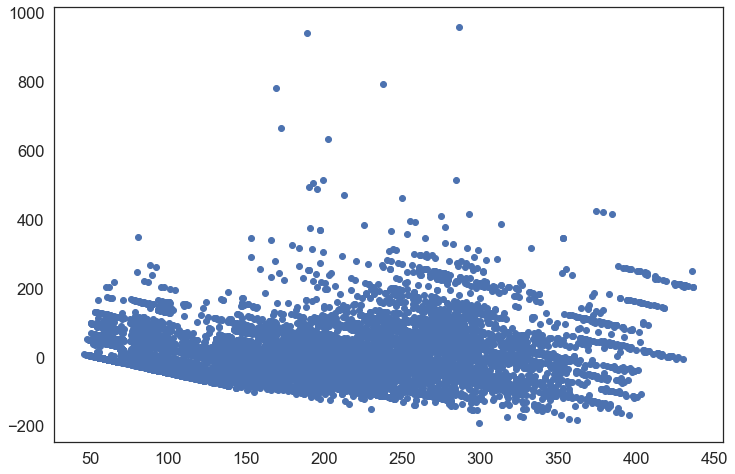

In [1283]:
# Use statsmodels to plot the residuals vs the fitted values
plt.figure(figsize=(12,8))
plt.scatter(fit.predict(), fit.resid);

In [777]:
df_min.head()

,Date,Destination,FlightDuration,Price,Airline,Days,weekday,Daysmin21,Daysmin28,Daysmin35,Daysmin42,Daysmin49,Daysmin56,Daysmin63,Daysmin70
1691,2019-09-20,BOI,1.53,54.0,Delta,60,Friday,21,28,35,42,49,56,60,60
1487,2019-09-18,BOI,1.50,54.0,Alaska,58,Wednesday,21,28,35,42,49,56,58,58
15819,2019-08-14,BOI,1.58,54.0,Alaska,23,Wednesday,21,23,23,23,23,23,23,23
15859,2019-10-27,BOI,1.62,54.0,Delta,97,Sunday,21,28,35,42,49,56,63,70
11794,2019-11-11,BOI,1.48,54.0,Delta,112,Monday,21,28,35,42,49,56,63,70


In [ ]:
#### Now lets regularize our data using Lasso, and perform some model validation testing
##### we can start with our mins, and then work our way to all three data sets

In [1382]:
#Models to test:

    # 1. df_min_dum - 
    # 2. df_all_dum - both 1 and 2 are city dummys only
    
    # 3. df_avg_dum_weekday  - looks at weekday factors on averages
    
    # 4. df_min
    # 5. df_all   - these look at the day step functions 
    
    # 6. df_everything
    # 7. df_everything_min   - these combine the city and day step function filter


## 1 and 2
    
#df_min_dum.head()  R2=0.63
#y,X= df_min_dum['Price'],df_min_dum.drop(['Price','Date','Destination','Airline'],axis=1)

#y = df_min_dum['Price']
#X = df_min_dum.loc[:,['FlightDuration','Days','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']]


#df_all_dum.head() R2=0.53
#y,X= df_all_dum['Price'],df_all_dum.drop(['Price','Date','Destination','Airline'],axis=1)

#y = df_all_dum['Price']
#X = df_all_dum.loc[:,['FlightDuration', 'Days','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']]




##  3 


#y = df_avg_dum_weekday['Price']
#X = df_avg_dum_weekday.loc[:,['FlightDuration','Days','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']]



##   4 and 5 


#y = df_min['Price']
#X = df_min.loc[:,['FlightDuration','Days','Daysmin21','Daysmin28','Daysmin35','Daysmin42','Daysmin49','Daysmin56']]


#y = df_all['Price']
#X = df_all.loc[:,['FlightDuration','Days','Daysmin21','Daysmin28','Daysmin35','Daysmin42','Daysmin49','Daysmin56']]


#  6 and 7 


y = df_everything['Price']
X = df_everything.loc[:,['FlightDuration','Days','Daysmin35','Daysmin42',
                       'Daysmin49','Daysmin56','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']]

#y = df_everything_min['Price']
#X = df_everything_min.loc[:,['FlightDuration','Days','Daysmin35','Daysmin42',
       #                'Daysmin49','Daysmin56','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']]


In [1383]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=13)

#X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25, random_state=43)


In [1384]:
X_train.head()

,FlightDuration,Days,Daysmin35,Daysmin42,Daysmin49,Daysmin56,ATL,AUS,BOI,BOS,DEN,DTW,FAI,JFK,ORD,SAN,SFO
10087,4.33,3,3,3,3,3,0,0,0,0,0,1,0,0,0,0,0
10078,4.17,3,3,3,3,3,0,0,0,0,0,0,0,0,1,0,0
9178,5.53,98,35,42,49,56,0,0,0,0,0,0,0,1,0,0,0
11039,3.83,24,24,24,24,24,0,0,0,0,0,0,1,0,0,0,0
775,3.92,92,35,42,49,56,0,0,0,0,0,0,1,0,0,0,0


In [1385]:
X_train.shape

(9526, 17)

In [1386]:
X_val.shape

(3176, 17)

In [1387]:
X_test.shape

(3176, 17)

In [1388]:
#min_weekdaycutoff, all weekday cutoff
#selected_columns = ['FlightDuration','Days','Daysmin21','Daysmin28','Daysmin35','Daysmin42','Daysmin49','Daysmin56']

#'Daysmin21','Daysmin28',


#min_weekday, all weekday
#selected_columns = ['FlightDuration','Days','Friday','Monday','Saturday','Sunday','Thursday','Tuesday','Wednesday']


#min_cities, all cities
#selected_columns = ['FlightDuration', 'Days','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']

#everything
selected_columns=['FlightDuration','Days','Daysmin35','Daysmin42',
                       'Daysmin49','Daysmin56','ATL','AUS','BOI','BOS','DEN','DTW','FAI','JFK','ORD','SAN','SFO']

In [1396]:
lasso_model = Lasso(alpha = 0) 
lasso_model.fit(X_train.loc[:,selected_columns], y_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22495788.892973892, tolerance: 11060.963217772412
  positive)


Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [1397]:
list(zip(selected_columns, lasso_model.coef_))

[('FlightDuration', 69.43675667936603),
 ('Days', -0.16151816869374655),
 ('Daysmin35', -11.739322425323106),
 ('Daysmin42', 15.838325934353096),
 ('Daysmin49', -7.133640975428924),
 ('Daysmin56', -0.7398540738034883),
 ('ATL', 17.461013289101967),
 ('AUS', -0.7478878394409751),
 ('BOI', 38.78537624696956),
 ('BOS', -55.36511710067157),
 ('DEN', 39.77668292293335),
 ('DTW', 31.23638490882978),
 ('FAI', -36.18986332980162),
 ('JFK', -62.80208027139747),
 ('ORD', -16.601087093874476),
 ('SAN', -9.585035856514871),
 ('SFO', 17.386271632032102)]

In [1398]:
test_set_pred = lasso_model.predict(X_test.loc[:,selected_columns])

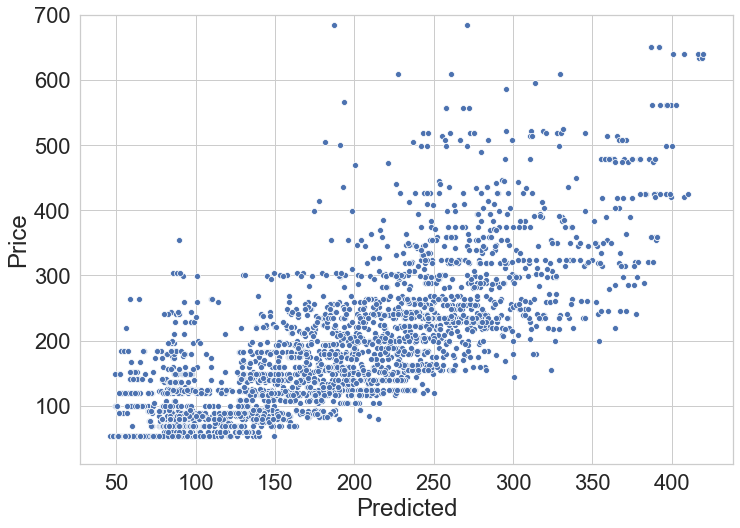

In [1406]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set(font_scale=2)
sns.set_style("whitegrid")
dg=sns.scatterplot(x=test_set_pred, y=y_test)
dg.set(ylim=(10, 700))
dg.set(xlabel='Predicted')


#dg=plt.scatter(test_set_pred, y_test, alpha=1)
#dg.set_size_inches(11.7, 8.27)
fig = dg.get_figure()
#fig.savefig("output.png")
fig.savefig('Modelstrengh.png', transparent=True,bbox_inches='tight')
#dg.set_ylabel('True Flight Price')
#dg.set_xlabel('Predicted Flight Price')


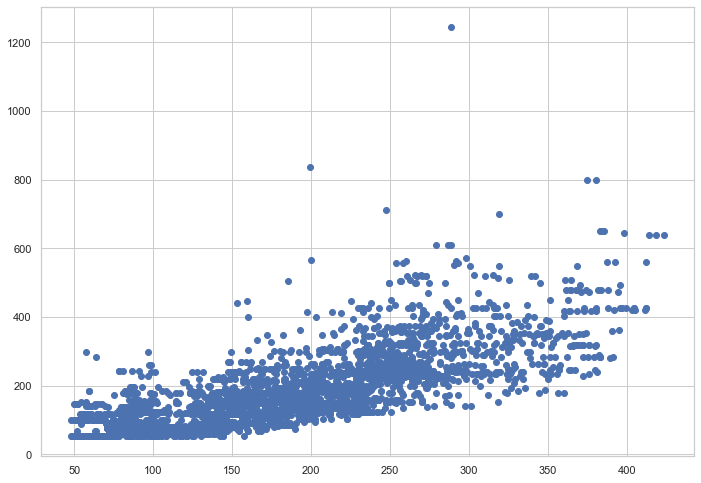

In [1400]:
test_set_pred2 = lasso_model.predict(X_val.loc[:,selected_columns])
plt.scatter(test_set_pred2, y_val, alpha=1)

In [1401]:
r2_score(y_test, test_set_pred)

0.5581448124960231

In [1402]:
def mae(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true)) 

mae(y_test, test_set_pred)

50.65554749487243

In [1225]:
alphalist = 10**(np.linspace(-2,2,200))
err_vec_val = np.zeros(len(alphalist))
err_vec_train = np.zeros(len(alphalist))
max_iter=5000
for i,curr_alpha in enumerate(alphalist):

    # note the use of a new sklearn utility: Pipeline to pack
    # multiple modeling steps into one fitting process 
    steps = [('standardize', StandardScaler()), 
             ('lasso', Lasso(alpha = curr_alpha))]

    pipe = Pipeline(steps)
    pipe.fit(X_train.loc[:,selected_columns].values, y_train)
    
    val_set_pred = pipe.predict(X_val.loc[:,selected_columns].values)
    err_vec_val[i] = mae(y_val, val_set_pred)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12200308.78305663, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11870264.508172488, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11535546.629119316, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11196526.05

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1749175.1830510385, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1553596.8449395187, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1370106.0866479576, tolerance: 11060.963217772412
  positive)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1198779.60

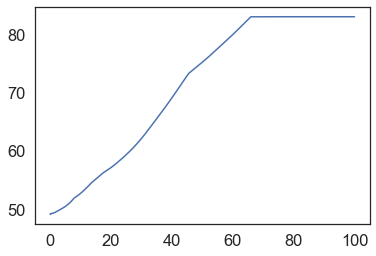

In [1226]:
#plot the curve of validation error as alpha changes

plt.plot(alphalist, err_vec_val)

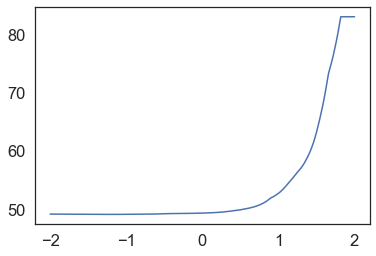

In [1227]:
plt.plot(np.log10(alphalist), err_vec_val)

In [713]:
##this will take the soupy html file and pull out data values for all flight results from a search##
# looking for [Date,DepartureCity,ArrivalCity,DepartureTime,
#               ArrivalTime,FlightDuration,Price,PlaneType,Airline,FlightNumber]
import re
#'https://www.google.com/flights?hl=en#flt=SFO.AUS.2019-08-21;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
#each page has a different number of flights on it, so for this URL we need to make a list of lists
#that is the length = number of flights on the page#


def DataGetter(URL,soup):

    Locations = re.search('#flt=(.+?);b:1', URL).group(1)
    Spots=Locations.split('.')
    Departure=Spots[0]
    Arrival = Spots[1]
    Date= Spots[2]



    flights=len(soup.find_all('div', attrs={'class': 'gws-flights-results__itinerary-duration'}))
    print('num of flights:',flights)
    BigList = [[] for _ in range(flights)]
    for flight in BigList:
        flight.append(URL)
        flight.append(Date)
        flight.append(Departure)
        flight.append(Arrival)

    # Append flight durations onto each element of the list
    i=-1
    for li in soup.find_all('div', attrs={'class': 'gws-flights-results__duration flt-subhead1Normal'}):
        i+=1
        chonk=li.get_text()
        try:
            ch=chonk.split('h')
            onk=chonk.split(' ')
            num2=onk[1]
            flight_duration=float(ch[0])+(float(num2[:-1])/60)
            flight_duration = round(flight_duration,2)
            BigList[i].append(flight_duration)
            #print ('flight_duration:',flight_duration)
        except:
            BigList[i].append('NaN')
            print('There was an issue')



    #for li in soup.find_all('div', attrs={'class': 'gws-flights-results__price'}):
        #print(li)


    #here we add more flight info from the jstcache. . . beware this number seems to change from day to day
    i=-1
    for li in soup.find_all('jsl', attrs={'jstcache': "8836"}):
        i+=1
        text = li.get_text()

          #finding price
        try:
            found = re.search('From (.+?)Trip', text).group(1)
            dollar=found.replace(',','')
            found=float(dollar[1:-1])
        except AttributeError:
        # if the sentence structure i didnt expect show up
            found = 'NaN' # apply your error handling
        #print('cost:',found)
        BigList[i].append(found)
        #finding departure and arrival times
        try:
            found = re.search('Departure time: (.+?)M', text).group(1)
            found2 = re.search('Arrival time: (.+?)M', text).group(1)

            #departure=found.replace(',','')
            #found=float(dollar[1:-1])
        except AttributeError:
        # if the sentence structure i didnt expect show up
            found = 'NaN' # apply your error handling
        #print('Departure Time:',found)
        #print('Arrival Time:',found2)
        BigList[i].append(found)
        BigList[i].append(found2)


        #grab airline
        try:
            found = re.search('by (.+?).Depa', text).group(1)

            #departure=found.replace(',','')
            #found=float(dollar[1:-1])
        except AttributeError:
        # if the sentence structure i didnt expect show up
            found = 'NaN' # apply your error handling
        #print('Airline:',found)
        BigList[i].append(found)
    #print('')
        #grab PlaneType and flight number
    i=-1    
    for li in soup.find_all('div', attrs={'class': 'gws-flights-results__other-leg-info'}):
            i+=1
            #print(li.get_text())
            st=li.get_text()
            #st=str(st.text())
            result = re.match("(?P<PlaneType>[A-Za-z]+.[A-Za-z]*[0-9]+)(?P<FlightNum>[A-Za-z]+\s[0-9]+)", st)
            if result:
                Planetype=result.group('PlaneType')
                Flightnumber=result.group('FlightNum')
                Flightnumber=Flightnumber.replace('\xa0','')
                #print('Flightnum:',Flightnumber)
                #print('Planetype:',Planetype)
                BigList[i].append(Flightnumber)
                BigList[i].append(Planetype)
                #print("")
            else:
                errormsg=('REGEXerror:',st)
                BigList[i].append(errormsg)
                BigList[i].append(errormsg)

    return BigList

In [231]:
for lists in BigList:
    print(len(lists))

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


In [275]:
##Format URLs, can create these lists:      super_short_test_list//test_urls//full_cities_lessdates_urls//
##//full_dates_lesscities_urls//full_url_list//come_home_URLS##

cities=['SFO','AUS','ATL','BOI','BOS','ORD','DEN','DTW','FAI','JFK','SAN']

##links look like this for one ways,nonstop, with overhead bags allowed, and frontier airlines excluded##
'https://www.google.com/flights?hl=en#flt=SFO.AUS.2019-08-21;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'

#This makes all the dates from july 22nd to the end of the year, will update from date time later if i have time
dates=['2019-07-22']
for days in range(23,32):
    date = '2019-07-' + str(days)
    dates.append(date)
for days in range(1,32):
    if days>=10:
        date = '2019-08-' + str(days)
        dates.append(date)
    else:
        date = '2019-08-0' + str(days)
        dates.append(date)
for days in range(1,31):
    if days>=10:
        date = '2019-09-' + str(days)
        dates.append(date)
    else:
        date = '2019-09-0' + str(days)
        dates.append(date)
for days in range(1,32):
    if days>=10:
        date = '2019-10-' + str(days)
        dates.append(date)
    else:
        date = '2019-10-0' + str(days)
        dates.append(date) 

for days in range(1,31):
    if days>=10:
        date = '2019-11-' + str(days)
        dates.append(date)
    else:
        date = '2019-11-0' + str(days)
        dates.append(date)           

for days in range(1,32):
    if days>=10:
        date = '2019-12-' + str(days)
        dates.append(date)
    else:
        date = '2019-12-0' + str(days)
        dates.append(date)         

## This makes lists of URLS to use generating data##
super_short_test_list=[]
super_short_test_list_dates=[]
for city in cities[::6]:
    URLc='https://www.google.com/flights?hl=en#flt=SEA.'+city+'.'
    
    for date in dates[::43]:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        super_short_test_list.append(URL)
        super_short_test_list_dates.append(date)
        
print('super short test set has this many values:'+str(len(super_short_test_list)))

test_urls=[]
for city in cities[::5]:
    URLc='https://www.google.com/flights?hl=en#flt=SEA.'+city+'.'
    
    for date in dates[::29]:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        test_urls.append(URL)
print('test set has this many values:'+str(len(test_urls)))        
        
full_cities_lessdates_urls=[]
for city in cities:
    URLc='https://www.google.com/flights?hl=en#flt=SEA.'+city+'.'
    
    for date in dates[::15]:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        full_cities_lessdates_urls.append(URL)
print('full city set has this many values:'+str(len(full_cities_lessdates_urls)))   

full_dates_lesscities_urls=[]
for city in cities[::3]:
    URLc='https://www.google.com/flights?hl=en#flt=SEA.'+city+'.'
    
    for date in dates:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        full_dates_lesscities_urls.append(URL)
print('full date set has this many values:'+str(len(full_dates_lesscities_urls)))  

full_url_list=[]
for city in cities:
    URLc='https://www.google.com/flights?hl=en#flt=SEA.'+city+'.'
    
    for date in dates:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        full_url_list.append(URL)
print('full set has this many values:'+str(len(full_url_list)))  

come_home_URLS=[]
for city in cities:
    URLc='https://www.google.com/flights?hl=en#flt='+city+'.'+'SEA.'
    for date in dates:
        URL=URLc+date+';b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o'
        come_home_URLS.append(URL)
print('come home set has this many values:'+str(len(come_home_URLS)))  



super short test set has this many values:8
test set has this many values:18
full city set has this many values:121
full date set has this many values:652
full set has this many values:1793
come home set has this many values:1793


https://www.google.com/flights?hl=en#flt=SEA.ORD.2019-07-22;b:1;c:USD;e:1;s:0;a:-F9;sd:1;t:f;tt:o


In [ ]:
## how to avoid booting from server ideas . . . .
for page in super_short_test_list:
    ### scrape a website
    ### ...
    print(page)
    
    time.sleep(2)
    #time.sleep(.5+2*random.random())
    
import sys
import requests
from bs4 import BeautifulSoup

url = 'http://www.reddit.com'

user_agent = {'User-agent': 'Mozilla/5.0'}
response  = requests.get(url, headers = user_agent)

from fake_useragent import UserAgent

ua = UserAgent()
user_agent = {'User-agent': ua.random}
print(user_agent)

response  = requests.get(url, headers = user_agent)
print(response.text)